#Simple Linear Regression
Simple Linear Regression uses only one feature to make predictions, with the assumption that the variables are linearly related.

##Manual Approach
We code the formulas manually.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def coef_estimation(X, Y):
  n = np.size(X) # the number of observations
  # calculate mean of x and y
  mean_X, mean_Y = np.mean(X), np.mean(Y) 
  # calculate deviation and cross deviation
  SS_xy = np.sum(X*Y) - n*mean_X*mean_Y
  SS_xx = np.sum(X*X) - n*mean_X*mean_X
  # calculate regression coefficients (b)
  b1 = SS_xy / SS_xx
  b0 = mean_Y - b1*mean_X

  return b0, b1

In [ ]:
def plot_regression_line(X, Y, b):
  # plot the actual data points
  plt.scatter(X, Y, color="m", marker="o", s=30)
  # predict the response
  y_pred = b[0] + b[1]*X
  # plot the regression line and labels
  plt.plot(X, y_pred, color="g")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()

In [ ]:
def main():
  # make dummy data
  X = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
  Y = np.array([100, 300, 350, 500, 750, 800, 850, 900, 1050, 1250])
  b = coef_estimation(X, Y)
  print("Estimated coefficients:\nb0 = {} \nb1 = {}".format(b[0], b[1]))
  plot_regression_line(X, Y, b)

Estimated coefficients:
b0 = 154.5454545454545 
b1 = 117.87878787878788


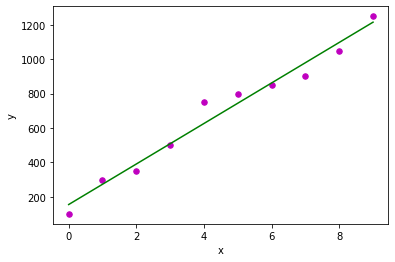

In [ ]:
if __name__ == "__main__":
  main()

## Using scikit-learn
scikit-learn has a linear regression model we can use.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# make dummy data
X = np.array([x for x in range(20)])
Y = np.array([100, 300, 350, 500, 750, 800, 850, 900, 1050, 1250, 1350, 1500, 1750, 1950, 2000, 2200, 2150, 2350, 2400, 2500])
print("x =", X)
print("y =", Y)

x = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
y = [ 100  300  350  500  750  800  850  900 1050 1250 1350 1500 1750 1950
 2000 2200 2150 2350 2400 2500]


In [ ]:
# split data for training and testing
X_train = X[:-5].reshape(-1, 1)
X_test = X[-5:].reshape(-1, 1)
Y_train = Y[:-5].reshape(-1, 1)
Y_test = Y[-5:].reshape(-1, 1)

In [ ]:
# create linear regression object
regressor = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)

# make predictions
y_pred = regressor.predict(X_test)
print(y_pred)

[[2086.66666667]
 [2219.16666667]
 [2351.66666667]
 [2484.16666667]
 [2616.66666667]]


In [ ]:
# print some scores
print('Coefficients:', regressor.coef_)
print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))
print('Variance score: %.2f' % r2_score(Y_test, y_pred))

Coefficients: [[132.5]]
Mean squared error: 7665.28
Variance score: 0.54


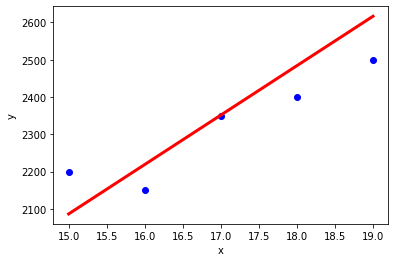

In [ ]:
# plot the regression result
plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##Using Neural Network (Tensorflow)
Neural network calculates the probabilities for the relationship between X and Y.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
# make dummy data with the relationship Y = 2X - 1
X = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
Y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)
print("x =", X)
print("y =", Y)

x = [-1.  0.  1.  2.  3.  4.]
y = [-3. -1.  1.  3.  5.  7.]


In [ ]:
# define the model
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd',
              loss='mean_squared_error')

In [ ]:
# train the model
model.fit(X, Y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1551
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1519
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 0.1488
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1457
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.1427
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1398
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1369
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1341
Epoch 9/500
1/1 [==============================] - 0s 8ms/step - loss: 0.1314
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 0.1287
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 0.1260
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 0.1234
Epoch 13/500
1/1 [==============================] - 0s 7ms

In [ ]:
# use model for prediction
print(model.predict([10.0]))

[[18.99352]]


#Multiple Linear Regression
Multiple linear regression uses two or more independent variable (or features) to make predictions.

We will be using Boston housing dataset from scikit-learn.

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [67]:
# load the dataset
boston = datasets.load_boston(return_X_y=False)

# define the features and target variable
X = boston.data
y = boston.target
print(X[:5])
print(y[:5])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
[24.  21.6 34.7 33.4 36.2]


In [70]:
# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [77]:
# create a linear regression object
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

# try and make prediction
print(regressor.predict(X_test[0].reshape(1, -1)))

[27.6044582]


In [73]:
# print some scores
print('Coefficients:\n', regressor.coef_)
print('Variance score: {}'.format(regressor.score(X_test, y_test)))

Coefficients:
 [-1.06413988e-01  8.35043503e-03  5.90326584e-02  4.04417760e+00
 -1.34817817e+01  5.68442507e+00 -3.43017906e-02 -1.12498387e+00
  8.58963508e-02 -1.70969203e-03 -1.02494347e+00  1.32699724e-02
 -3.79865881e-01]
Variance score: 0.70074741801493


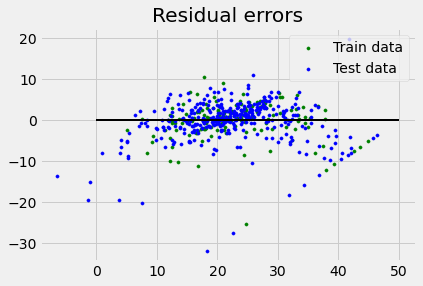

In [75]:
# plot the residual error
plt.style.use('fivethirtyeight')
plt.scatter(regressor.predict(X_train),
            regressor.predict(X_train) - y_train,
            color="green",
            s=10,
            label='Train data')

plt.scatter(regressor.predict(X_test),
            regressor.predict(X_test) - y_test,
            color="blue",
            s=10,
            label='Test data')

plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual errors")
plt.show()